## Derivatives

Assume we have a function, $f(t)$, which has some behaviour. We can take the value of the function at $f(0)$, and then at some other value, $f(\Delta)$, and some other, $f(\Delta*2)$, and so on.

The *derivative* of a function at some point $a$, is equal to the slope of a tangent line to the function. Imagine picking two points on a function $f$, like $f(x)$ and $f(x + h)$, for some real value of $h$. Taking the difference of these values, $f(x+h)-f(x)$ gives how much the function changed in the "y" axis in the interval ${x, x + h}$.
We can make an infinite number of these "*finite differences*".

If we divide these finate differences by the size of the gap, $h$, we get the amount of "y" change "normalized" by the gap "h". In other words, the slope of the line that passes through the points $x, f(x)$ and $x + h, f(x + h)$ is given by:

$$
\frac{f(x+h)-f(x)}{h}
$$

Imagine now making $h$ smaller and smaller, that is calculating the limit
$$
f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

The imaginary line that passes between the two points $x, f(x)$ and $x + h, f(x + h)$ becomes tangent to $f(x)$, as the two points move closer and closer. This is the *point derivative* of $f$ at some point $x$. The function $f'$ is the *derivative* of $f$, in other words:

$$
D[f] = f'
$$

Where $D$ is the "differential" operator.

We often cannot calculate sybolically the derivative, either we don't know the original function (we just have data) or it's not easy do to symbolically. We can turn to this definition, setting a small $h$, and actually calculating $\frac{f(x+h)-f(x)}{h}$.

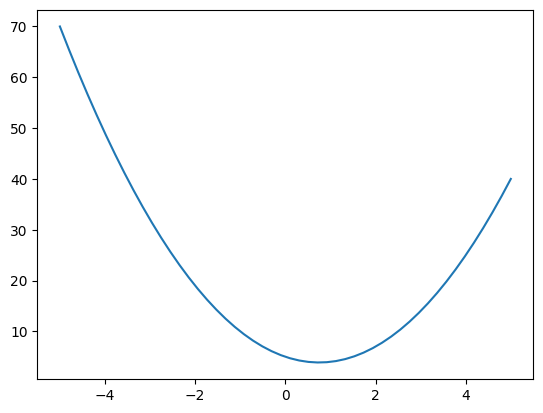

In [1]:
import matplotlib.pylab as pl

def fn1(x):
    return (2 * (x **2)) - (3 * x) + 5

space = pl.linspace(-5, 5, 50)

pl.plot(space, fn1(space))

In [2]:
# The h above is an arbitrary "step". The "step", in our case, is controlled by
# the number of points we asked when making our linear space:
#
#                            vv
# space = pl.linspace(-5, 5, 50)
#
# Since all points are equidistant (by the value of h),
# we can calculate the h with something like:
h = space[1] - space[0]
print(f"The delta of this function is {h}")
# Any two points will do, as they are all be evenly spaced

# We can do this same subtraction with all pairs of points with the `diff` function.
# Is this case, it is applied to the fn1(space), to gain the numerator of the above
# equations, i.e. f(h*i) - f(h), where i is 0, 1, 2, ...

# We can just divide this by h...
dfx = pl.diff(fn1(space)) / h
# ...these values are the "speed of change" in the intervals,
# that is, the point-derivative values.
print(dfx)

The delta of this function is 0.204081632653061
[-22.59183673 -21.7755102  -20.95918367 -20.14285714 -19.32653061
 -18.51020408 -17.69387755 -16.87755102 -16.06122449 -15.24489796
 -14.42857143 -13.6122449  -12.79591837 -11.97959184 -11.16326531
 -10.34693878  -9.53061224  -8.71428571  -7.89795918  -7.08163265
  -6.26530612  -5.44897959  -4.63265306  -3.81632653  -3.
  -2.18367347  -1.36734694  -0.55102041   0.26530612   1.08163265
   1.89795918   2.71428571   3.53061224   4.34693878   5.16326531
   5.97959184   6.79591837   7.6122449    8.42857143   9.24489796
  10.06122449  10.87755102  11.69387755  12.51020408  13.32653061
  14.14285714  14.95918367  15.7755102   16.59183673]


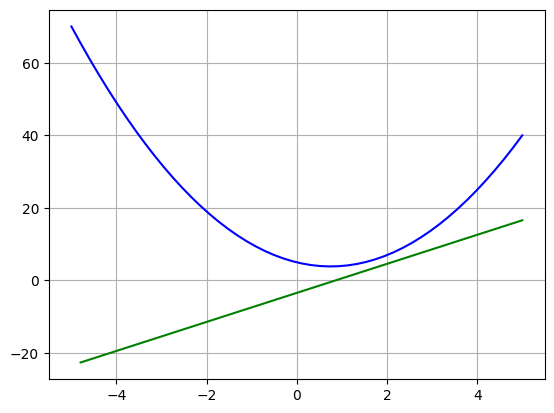

In [3]:
# We can plot the results.
pl.plot(space[1:], dfx, "g")
pl.plot(space, fn1(space), "b")
pl.grid()

In [4]:
# We can find the real derivative with the sympy lib
import sympy as sp

xx = sp.symbols("x")
sp.diff((2 * (xx **2)) - (3 * xx) + 5, xx)

4*x - 3

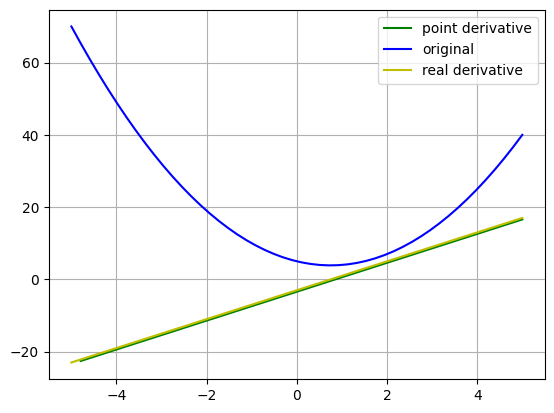

In [5]:
# Let's see how our aproximation with an h that is not infinitely small
# is in respect of the true, symbolical derivative.

def real_der(x):
    return 4 * x - 3

pl.plot(space[1:], dfx, "g", label = "point derivative")
pl.plot(space, fn1(space), "b", label = "original")
pl.plot(space, real_der(space), "y", label = "real derivative")
pl.legend()
pl.grid()

# They are almost congruent!

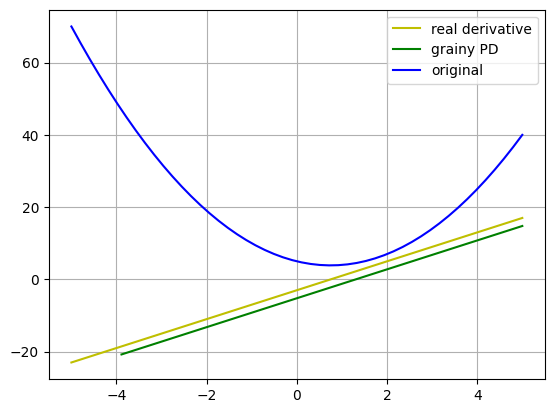

In [6]:
# let's see if we  decrease the delta value...
## TODO: re-run this but w/ a larger delta

grainy_space = pl.linspace(-5, 5, 10) # We calculate the aproximate derivative w/ just 10 points...
grainy_h = grainy_space[1] - grainy_space[0]
grainy_dfx = pl.diff(fn1(grainy_space)) / grainy_h

pl.plot(space, real_der(space), "y", label = "real derivative")
pl.plot(grainy_space[1:], grainy_dfx, "g", label = "grainy PD")
pl.plot(space, fn1(space), "b", label = "original")
pl.legend()
pl.grid()
# See how it differs more pronouncedly with the real derivative?

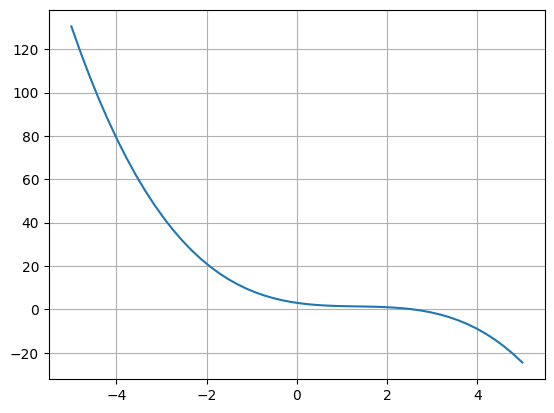

In [7]:
# Another example:
def fn2(x):
    return (-0.5 * x**3)+ (2 * x**2) - (3 * x) + 3

pl.plot(space, fn2(space))
pl.grid()

# h is the same above
df2x = pl.diff(fn2(space)) / h

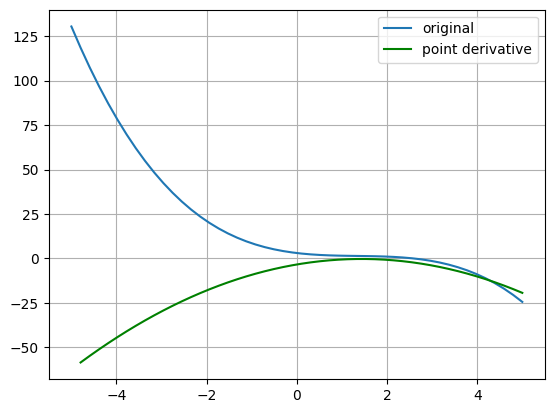

In [8]:
pl.plot(space, fn2(space), label = "original")
pl.plot(space[1:], df2x, "g", label = "point derivative")
pl.legend()
pl.grid()

In [9]:
print(sp.diff((-0.5 * xx**3)+ (2 * xx**2) - (3 * xx) + 3, xx))

def real_fn2_der(x):
    return -1.5 * (x**2) + 4 * x - 3

-1.5*x**2 + 4*x - 3


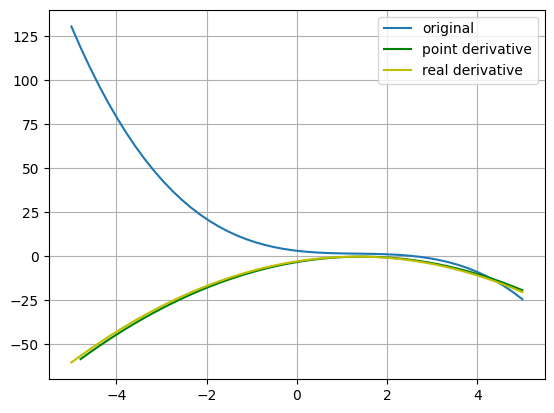

In [10]:
pl.plot(space, fn2(space), label = "original")
pl.plot(space[1:], df2x, "g", label = "point derivative")
pl.plot(space, real_fn2_der(space), "y", label = "real derivative")
pl.legend()
pl.grid()